In [2]:
#Program to Load and Explore the dataset of CSV and Excel files using Pandas
import pandas as pd

#Define the file path
csv_filepath="D:\ML\ML_dataset\Salary_Data.csv"
excel_filepath="D:\ML\ML_dataset\sales.xlsx"

#Load the csv file
data_csv=pd.read_csv(csv_filepath)
print("CSV File Data\n")
print(data_csv)

#Load the excel file
data_excel=pd.read_excel(excel_filepath)
print("\n\nExcel File Data\n")
print(data_excel)

#Basic data exploration
print("\n\nData Description\n")

print("CSV Data Description\n")
print(data_csv.describe())

print("\n\nExcel Data Description\n")
print(data_excel.describe())

#Displaying data types
print("\n\nData types in csv file\n")
print(data_csv.dtypes)

print("\n\nData types in excel file")
print(data_excel.dtypes)

CSV File Data

   YearsExperience  Salary
0              1.1   30000
1              2.2   40000
2              3.7   45000
3              4.1   50000
4              5.1   55000
5              6.0   60000


Excel File Data

   Year   Zone   Product  Units  Revenue
0  2005   west     plums    739  1707.09
1  2006   east      skim    712  1808.48
2  2006  south     Edies    647  2076.87
3  2007  north    apples    615  1894.20
4  2007   west  cherries    714  1856.40


Data Description

CSV Data Description

       YearsExperience        Salary
count         6.000000      6.000000
mean          3.700000  46666.666667
std           1.812181  10801.234497
min           1.100000  30000.000000
25%           2.575000  41250.000000
50%           3.900000  47500.000000
75%           4.850000  53750.000000
max           6.000000  60000.000000


Excel Data Description

             Year       Units      Revenue
count     5.00000    5.000000     5.000000
mean   2006.20000  685.400000  1868.608000
s

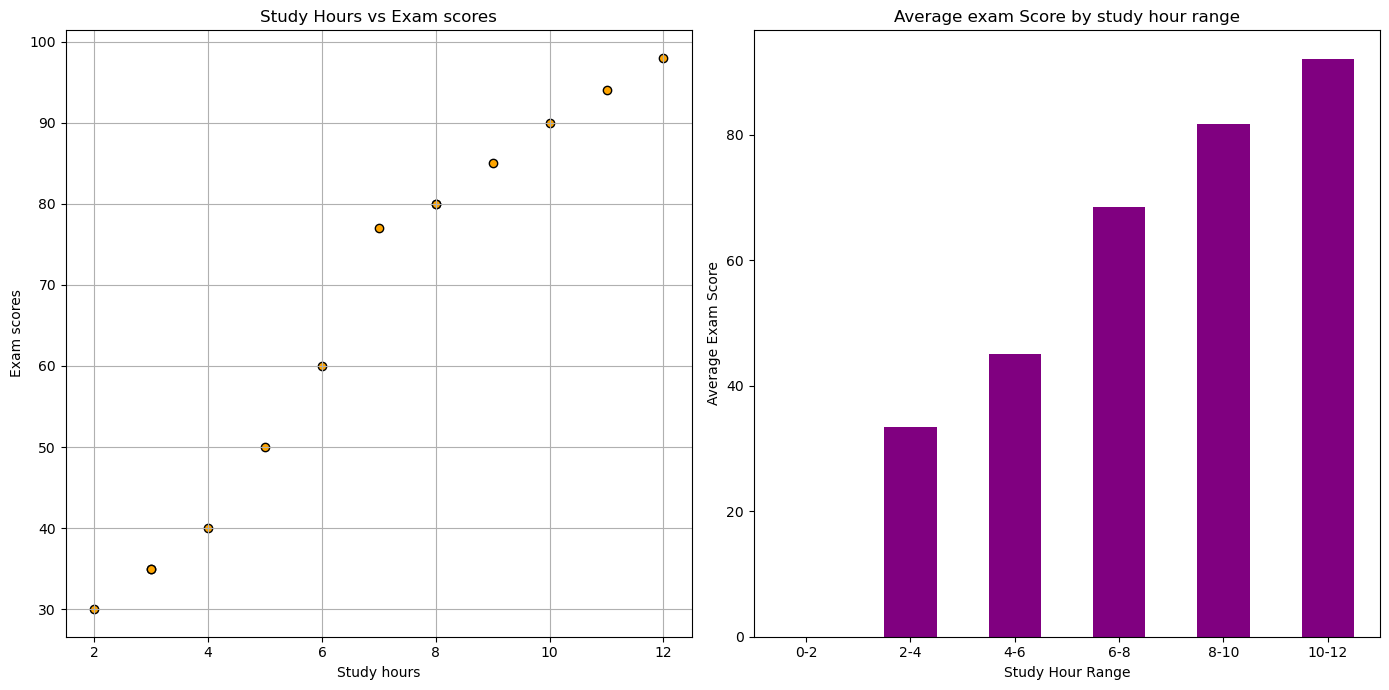

In [9]:
#Program to program to Visualize the dataset to gain insights using Matplotlib by plotting scatter plots,bar charts.
import pandas as pd
import matplotlib.pyplot as plt

#Load the data
data=pd.read_csv("D:\ML\ML_dataset\study_data.csv")

#Scatter plot of Study hours vs Exam scores
plt.figure(figsize=(14,7))
# 1 row, 2 columns, 1st subplot
plt.subplot(1,2,1)
plt.scatter(data['Study hours'],data['Exam scores'],color='orange',edgecolor='k',alpha=1)
plt.title("Study Hours vs Exam scores")
plt.xlabel('Study hours')
plt.ylabel('Exam scores')
plt.grid(True)

#Bar chart average Exam score by Study hour range
#Creating bins for study hour ranges
bins=[0,2,4,6,8,10,12]
labels=['0-2','2-4','4-6','6-8','8-10','10-12']
data['Study Hour Range']=pd.cut(data['Study hours'],bins=bins,labels=labels,right=False)
grouped_data=data.groupby('Study Hour Range')['Exam scores'].mean()
plt.subplot(1,2,2)
grouped_data.plot(kind='bar',color='purple')

plt.title('Average exam Score by study hour range')
plt.xlabel('Study Hour Range')
plt.ylabel('Average Exam Score')
#Keep the category labels horizontal
plt.xticks(rotation=0)

#Adjust Subplots to fit into figure area
plt.tight_layout()
plt.show()



In [31]:
#Program to Handle missing data,encode categorical variables and perform feature scaling.
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

#Create dummy data
data={
    'Age':[25,30,None,28,35],
    'Gender':['Feamle','Male','Male','Female','Male'],
    'Income':[50000,60000,45000,None,70000]
}

df=pd.DataFrame(data)

#Handling missing data
imputer=SimpleImputer(strategy='mean')
df[['Age','Income']]=imputer.fit_transform(df[['Age','Income']])

#Print data after handling missing value
print("Data after handling missing values")
print(df)

#Encoding categorical variables
encoder=OneHotEncoder()
encoded_data=encoder.fit_transform(df[['Gender']]).toarray()

#Print data after categorical encoding
encoded_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(['Gender']))
print("\nData after categorical encoding:")
print(encoded_df)

#Feature scaling
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df[['Age','Income']])

#Print data after feature scaling
scaled_df=pd.DataFrame(scaled_data,columns=['Scaled age','Scaled Income'])
print("\n Data after feature scaling")
print(scaled_df)

Data after handling missing values
    Age  Gender   Income
0  25.0  Feamle  50000.0
1  30.0    Male  60000.0
2  29.5    Male  45000.0
3  28.0  Female  56250.0
4  35.0    Male  70000.0

Data after categorical encoding:
   Gender_Feamle  Gender_Female  Gender_Male
0            1.0            0.0          0.0
1            0.0            0.0          1.0
2            0.0            0.0          1.0
3            0.0            1.0          0.0
4            0.0            0.0          1.0

 Data after feature scaling
   Scaled age  Scaled Income
0   -1.382164      -0.727778
1    0.153574       0.436667
2    0.000000      -1.310001
3   -0.460721       0.000000
4    1.689312       1.601112


In [3]:
#Program to implement a k-Nearest Neighbors(k-NN) classifier using scikitleran and Train the classifier on the
#        dataset and evaluate its performance.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Dummy dataset
x=np.array([[80,75],[95,90],[60,50],[45,30],[30,40],[85,95],[70,60],[50,55],[40,45],[60,70]])
y=np.array([1,1,0,0,0,1,1,0,0,1])

#Spli the data into training and testing sets
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.2, random_state=42)

#Initialize the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

#Train the classifier on the training data
knn.fit(x_train, y_train)

#Evaluate the classifier's performance
y_pred = knn.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print("accuracy on the test set: {:.2f}".format(accuracy))

#Take user input for exam scores
exam_score1 = float(input("enter exam score 1:"))
exam_score2 = float(input("enter exam score 2:"))

#Prepare the user input for prediction
user_input = np.array([[exam_score1, exam_score2]])

#Use the trained k-NN classifier to predict the outcome
predict_outcome = knn.predict(user_input)

if predict_outcome[0] == 1:
    print("Based on exam scores provided, the student is predict to pass.")
else:
    print("Based on exam scores provided, the student is predict to fail.")

accuracy on the test set: 1.00
enter exam score 1:50
enter exam score 2:45
Based on exam scores provided, the student is predict to fail.


In [4]:
#Program to implement a linear regression model for regression tasks and Train the model on a dataset
#    with continuous target variables.
import numpy as np
from sklearn.linear_model import LinearRegression

#Dummy house price prediction data
x = np.array([[1000, 2], [1500, 3],[1200, 2], [1800, 4],[900, 2], [2000,3]])
y = np.array([300000, 400000, 350000, 500000, 280000, 450000])

#Initialize the Linear Regression
model = LinearRegression()

#Train the model on the dataset
model.fit(x, y)

#Take input from the user for new house data
size  = float (input("enter the size of the house in sqft:"))
bedrooms = int (input("enter the number of bedrooms:"))
new_data = np.array([[size, bedrooms]])

#Predict the price for the new house data
predicted_price = model.predict(new_data)

#Print the predicted price for the new house data
print("predicted price for a house with size {} sqft and {} bedrooms: Rs.{:.2f}".format (size,bedrooms,predicted_price[0]))

enter the size of the house in sqft:7000
enter the number of bedrooms:4
predicted price for a house with size 7000.0 sqft and 4 bedrooms: Rs.1028393.44


Decision Tree Classifier Rules:/ |--- texture <= 0.50
|   |--- class: apple
|--- texture >  0.50
|   |--- weight <= 185.00
|   |   |--- class: orange
|   |--- weight >  185.00
|   |   |--- class: melon



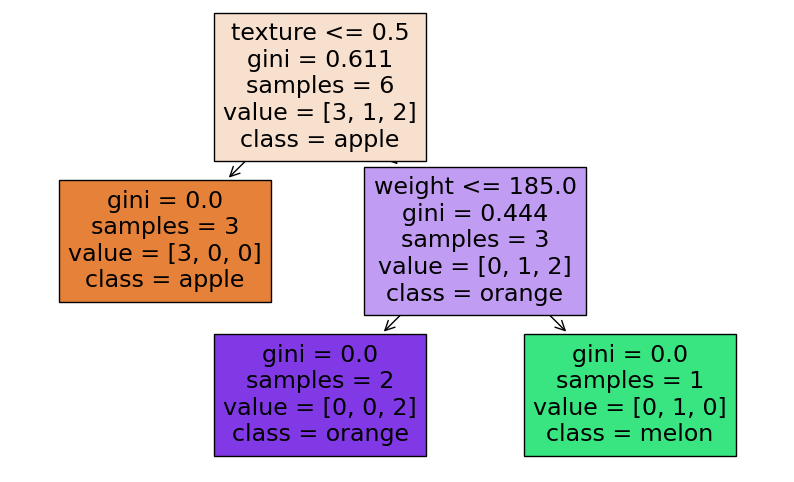

In [37]:
#Program to implement a decision tree classifier using scikit-learn and visualize the decision tree and 
#     understand its splits.
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_text
import matplotlib.pyplot as plt

#Custom dummy data for fruit classification
x = np.array([[150, 0], [170, 1], [120, 0], [140, 1], [200, 1], [130, 0]])
y = np.array(['apple', 'orange', 'apple', 'orange', 'melon', 'apple'])

#Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x,y)

#Visualize the Decision Tree splits
tree_rules = export_text(clf, feature_names=['weight', 'texture'])
print("Decision Tree Classifier Rules:/", tree_rules)

#Plot the Decision Tree
plt.figure(figsize=(10,6))
plot_tree(clf, filled=True, feature_names=['weight', 'texture'], class_names=np.unique(y).tolist())
plt.show()          

C:\Users\THANUSHREE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\THANUSHREE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


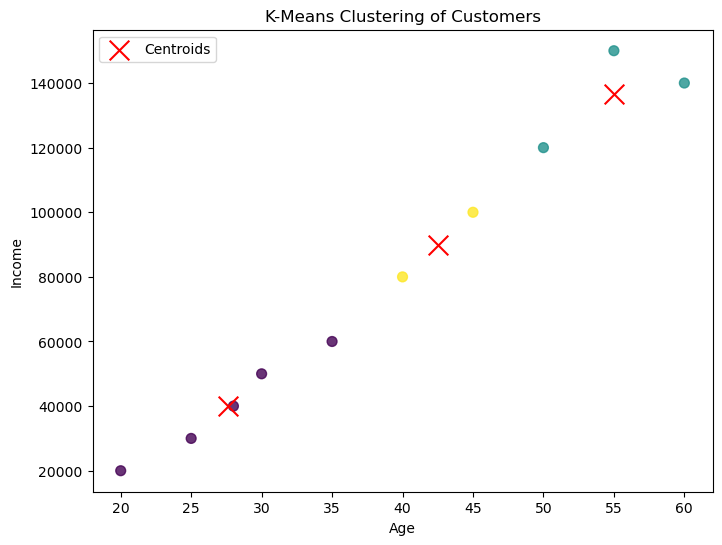

In [30]:
#Program to implement K-Means clustering and Visualize clusters.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the dataset
x = np.array([[30, 50000], [35, 60000], [40, 80000], [25, 30000], [45, 100000], 
              [20, 20000], [50, 120000], [55, 150000], [60, 140000], [28, 40000]])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)

# Get the labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-Means Clustering of Customers')
plt.legend()
plt.show()
